# Finding the best alloy with maximum yield strength using Metaheuristic algorithm approaches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("steel_strength.csv")

df.head(10)

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
5,Fe0.636C0.00881Mn0.000203Si0.00972Cr0.135Ni0.0...,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00,1328.3,1779.5,19.7
6,Fe0.644Mn0.000521Si0.00102Cr0.000110Ni0.177Mo0...,0.00,0.05,0.05,0.01,18.10,3.60,0.01,0.00,0.01,13.00,0.00,0.11,2.25,2501.1,2570.0,3.7
7,Fe0.646C0.00479Mn0.00597Si0.00492Cr0.135Ni0.00...,0.10,0.57,0.24,12.19,0.01,8.90,0.01,0.02,0.01,15.20,0.00,0.03,0.00,1228.9,1795.6,2.0
8,Fe0.648C0.000453Mn0.0000991Si0.0386Cr0.183Ni0....,0.01,0.01,1.99,17.50,2.10,0.02,0.01,0.00,0.01,11.80,0.00,0.03,0.05,1088.6,1419.3,10.0
9,Fe0.648C0.00751Mn0.000103Si0.000201Cr0.158Ni0....,0.16,0.01,0.01,14.56,0.01,4.90,0.48,0.05,0.01,15.60,0.00,0.04,0.00,1502.0,2008.4,11.5


In [3]:
df.isna().sum()

formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,312.0,0.096442,0.109008,0.00,0.010,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.010,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.010,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.100,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.960,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.500,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.010,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.010,0.010,0.0100,2.50
co,312.0,7.008782,6.254431,0.01,0.010,7.085,13.4800,20.10


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'mn'}>,
        <Axes: title={'center': 'si'}>, <Axes: title={'center': 'cr'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'mo'}>,
        <Axes: title={'center': 'v'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'nb'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'w'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'ti'}>,
        <Axes: title={'center': 'yield strength'}>,
        <Axes: title={'center': 'tensile strength'}>,
        <Axes: title={'center': 'elongation'}>]], dtype=object)

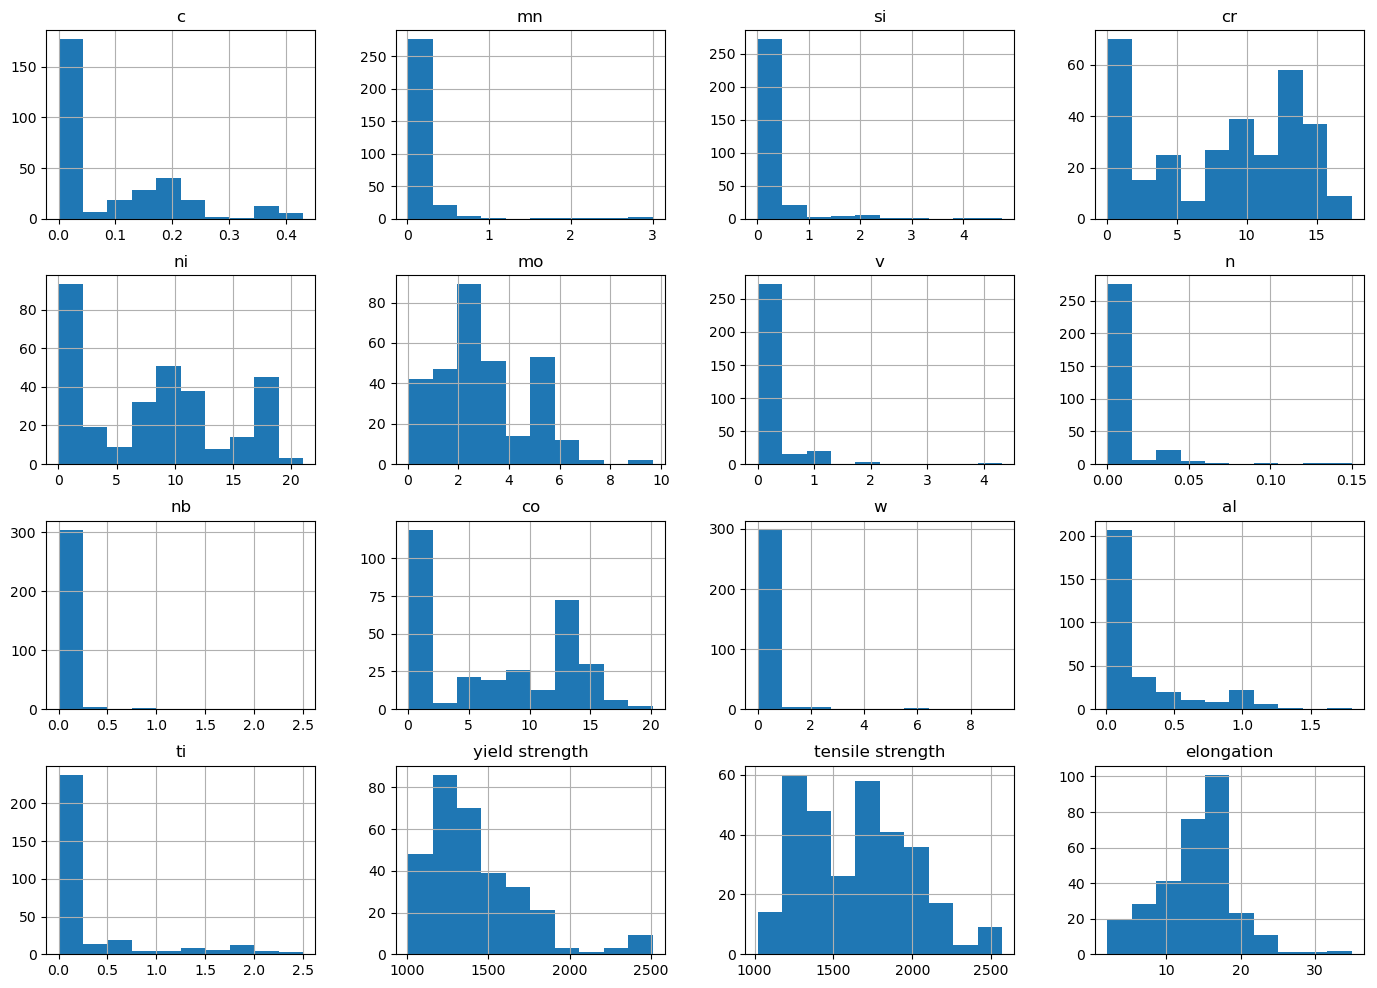

In [5]:
df.hist(figsize=(17,12))

In [6]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corrwith(df["yield strength"])

c                   0.146949
mn                 -0.172716
si                 -0.131461
cr                 -0.408730
ni                  0.252954
mo                  0.064278
v                   0.200595
n                  -0.117023
nb                  0.032042
co                  0.200274
w                  -0.025941
al                 -0.035487
ti                  0.510252
yield strength      1.000000
tensile strength    0.821071
elongation         -0.575289
dtype: float64

In [7]:
X = df.drop(columns=["formula", "elongation", "tensile strength", "yield strength"])

X.head(10)

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
5,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00
6,0.00,0.05,0.05,0.01,18.10,3.60,0.01,0.00,0.01,13.00,0.00,0.11,2.25
7,0.10,0.57,0.24,12.19,0.01,8.90,0.01,0.02,0.01,15.20,0.00,0.03,0.00
8,0.01,0.01,1.99,17.50,2.10,0.02,0.01,0.00,0.01,11.80,0.00,0.03,0.05
9,0.16,0.01,0.01,14.56,0.01,4.90,0.48,0.05,0.01,15.60,0.00,0.04,0.00


In [8]:
y = df['yield strength']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse}')

RMSE: 104.59908753213652


Text(0, 0.5, 'Predicted')

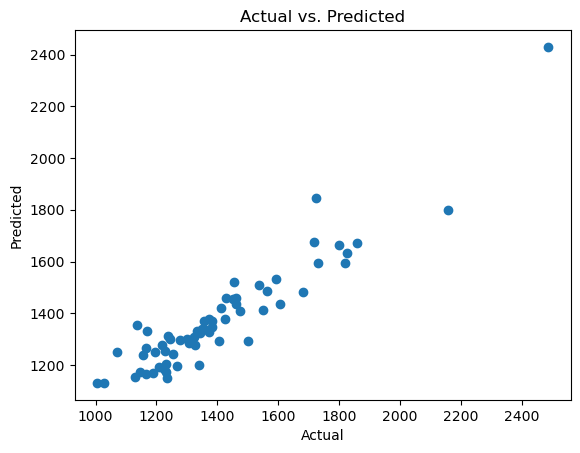

In [12]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

## let us check how good the fit is between actual and predicted by fitting to a linear regression and calculating R squared.

In [13]:
lin_model = LinearRegression()

lin_model.fit((y_test.values.reshape(-1, 1)), (y_pred))

r_sqaured = lin_model.score((y_test.values.reshape(-1, 1)), (y_pred))
print(f"R squared value is: ", r_sqaured)

R squared value is:  0.8682020402296649


## Let us also check the feature ranking to assess the importance of each dfeature, as reported by Random Forest

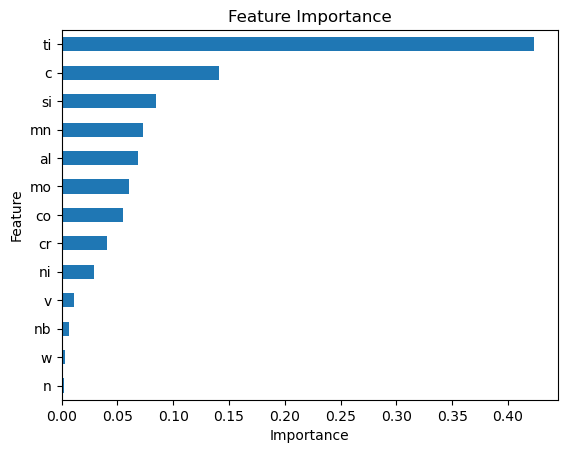

In [14]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features)
# Plot 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [15]:
model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
model_full.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
from geneticalgorithm2 import geneticalgorithm2 as ga

In [17]:
def obj_fun(X):
    X_reshaped = X.reshape(1, -1)
    # Calculate the prediction results from a given model
    result = model_full.predict(X_reshaped)

    # Ensure we get a scalar value (take first element if needed)
    if isinstance(result, (np.ndarray, list)):
        result = result[0]

    # Return the negative results
    return float(-result)

In [18]:
boundaries = np.array([[df['c'].min(), df['c'].max()],
[df['mn'].min(), df['mn'].max()],
[df['si'].min(), df['si'].max()],
[df['cr'].min(), df['cr'].max()],
[df['ni'].min(), df['ni'].max()],
[df['mo'].min(), df['mo'].max()],
[df['v'].min(), df['v'].max()],
[df['n'].min(), df['n'].max()],
[df['nb'].min(), df['nb'].max()],
[df['co'].min(), df['co'].max()],
[df['w'].min(), df['w'].max()],
[df['al'].min(), df['al'].max()],
[df['ti'].min(), df['ti'].max()]])

boundaries

array([[0.00e+00, 4.30e-01],
       [1.00e-02, 3.00e+00],
       [1.00e-02, 4.75e+00],
       [1.00e-02, 1.75e+01],
       [1.00e-02, 2.10e+01],
       [2.00e-02, 9.67e+00],
       [0.00e+00, 4.32e+00],
       [0.00e+00, 1.50e-01],
       [0.00e+00, 2.50e+00],
       [1.00e-02, 2.01e+01],
       [0.00e+00, 9.18e+00],
       [1.00e-02, 1.80e+00],
       [0.00e+00, 2.50e+00]])


Set: Average time of function evaluating (secs): 0.003940482139587403 (total = 0.39404821395874023)

Best score before optimization: -2440.5759999999987
                                                                                                                                                                                                        
 The best found solution:
 [ 0.02264146  1.54321608  1.70731566 15.28055143 19.11664237  8.21418927
  3.3993173   0.0924623   0.30706566 13.24756671  1.37977461  0.31207282
  2.27406657]

 Objective function:
 -2442.097000000003

 Used generations: 10
 Used time: 2.86 seconds


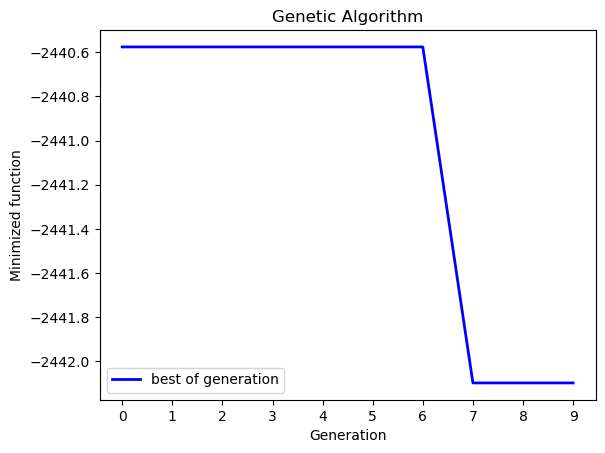

GAResult(last_generation=Generation(variables=array([[0.02264146, 1.54321608, 1.70731566, ..., 1.37977461, 0.31207282,
        2.27406657],
       [0.0623694 , 0.63785178, 1.70731566, ..., 1.37977461, 0.69980038,
        2.27406657],
       [0.18795259, 1.76368084, 1.73320836, ..., 2.34304183, 0.14157602,
        2.23980257],
       ...,
       [0.02264146, 1.76368084, 1.18722521, ..., 6.12287634, 0.45209915,
        0.79903737],
       [0.02264146, 1.58801333, 1.77683601, ..., 1.37977461, 0.45209915,
        0.65940148],
       [0.02264146, 0.90317476, 2.59060804, ..., 2.34304183, 0.79890177,
        0.083826  ]]), scores=array([-2442.097, -2435.778, -2427.829, -2427.829, -2427.829, -2426.858,
       -2426.858, -2425.846, -2421.291, -2421.291, -2419.643, -2419.519,
       -2418.105, -2418.105, -2418.105, -2416.483, -2413.179, -2412.599,
       -2411.96 , -2410.501, -2410.501, -2410.501, -2410.501, -2410.501,
       -2410.501, -2408.39 , -2407.439, -2407.439, -2407.439, -2407.439,
    

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")


algorithm_param = {'max_num_iteration': 10,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   # 'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

ga_model=ga(dimension=13,
            variable_type='real',
            variable_boundaries=boundaries, 
            algorithm_parameters=algorithm_param)

ga_model.run(function=obj_fun)

In [20]:
# Store the output results in a dictionary
result = ga_model.result

# Display the results
print("Results: ")
print('c:', result['variable'][0])
print('mn:', result['variable'][1])
print('si:', result['variable'][2])
print('cr:', result['variable'][3])
print('ni:', result['variable'][4])
print('mo:', result['variable'][5])
print('v:', result['variable'][6])
print('n:', result['variable'][7])
print('nb:', result['variable'][8])
print('co:', result['variable'][9])
print('w:', result['variable'][10])
print('al:', result['variable'][11])
print('ti:', result['variable'][12])

print("Max Yield Strength: ", -result['function'])

Results: 
c: 0.022641462978070157
mn: 1.5432160766634717
si: 1.707315656049535
cr: 15.280551429380136
ni: 19.11664236775452
mo: 8.214189269888319
v: 3.399317296021717
n: 0.09246229638882016
nb: 0.30706565788745366
co: 13.247566711929716
w: 1.37977461107005
al: 0.31207281623878375
ti: 2.274066570101141
Max Yield Strength:  2442.097000000003


C:\Users\ASUS\miniconda3\envs\RL\Lib\site-packages\geneticalgorithm2\data_types\result.py:25: UserWarning: 'function' field is deprecated, will be removed in version 7, use 'score' to get best population score
  warnings.warn(


# Optimizing using the Differential Evolution algorithm from the scipy library

In [21]:
from scipy.optimize import differential_evolution

In [22]:
def obj_fun(X):
    X_reshaped = X.reshape(1, -1)
    # Calculate the prediction results from a given model
    result = model_full.predict(X_reshaped)

    obj_fun.counter += 1
    print(obj_fun.counter)

    # Ensure we get a scalar value (take first element if needed)
    if isinstance(result, (np.ndarray, list)):
        result = result[0]

    # Return the negative results
    return float(-result)

In [23]:
boundaries = [(df['c'].min(), df['c'].max()),
(df['mn'].min(), df['mn'].max()),
(df['si'].min(), df['si'].max()),
(df['cr'].min(), df['cr'].max()),
(df['ni'].min(), df['ni'].max()),
(df['mo'].min(), df['mo'].max()),
(df['v'].min(), df['v'].max()),
(df['n'].min(), df['n'].max()),
(df['nb'].min(), df['nb'].max()),
(df['co'].min(), df['co'].max()),
(df['w'].min(), df['w'].max()),
(df['al'].min(), df['al'].max()),
(df['ti'].min(), df['ti'].max())]

In [24]:
obj_fun.counter = 0
opt_results = differential_evolution(obj_fun, boundaries)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [25]:
print('c:', opt_results.x[0])
print('mn:', opt_results.x[1])
print('si:', opt_results.x[2])
print('cr:', opt_results.x[3])
print('ni:', opt_results.x[4])
print('mo:', opt_results.x[5])
print('v:', opt_results.x[6])
print('n:', opt_results.x[7])
print('nb:', opt_results.x[4])
print('co:', opt_results.x[5])
print('w:', opt_results.x[6])
print('al:', opt_results.x[7])
print('ti:', opt_results.x[7])

print("Max Yield Strength: ", -opt_results.fun)

c: 0.2933140549649091
mn: 2.24582677494791
si: 1.155984407653078
cr: 5.239059904260966
ni: 18.21951367321268
mo: 7.584688702093212
v: 4.230762653090192
n: 0.10802851567870031
nb: 18.21951367321268
co: 7.584688702093212
w: 4.230762653090192
al: 0.10802851567870031
ti: 0.10802851567870031
Max Yield Strength:  2452.722000000002
